## Library Imports

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Data Ingestion

In [137]:
df = pd.read_csv('mel_house_price.csv')
df.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom,Bathroom,Car,...,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,year_list,month_list
0,Mooroolbark,3.0,h,PI,McGrath,11.38,3138.0,3.0,1.0,2.0,...,1980.0,Yarra Ranges Shire Council,-37.78156,145.30784,Eastern Victoria,8280.0,Attached Garage,870000,2017,10
1,Port Melbourne,3.0,t,S,Cayzer,3.80,3207.0,3.0,1.0,2.0,...,1944.8,Melbourne City Council,-37.83710,144.94780,Southern Metropolitan,8648.0,Attached Garage,1565000,2016,4
2,Northcote,1.0,u,S,Nelson,5.50,3070.0,1.0,1.0,2.0,...,1970.0,Darebin City Council,-37.78420,144.99910,Northern Metropolitan,11364.0,Carport,435000,2016,10
3,Abbotsford,4.0,h,S,Collins,2.50,3067.0,4.0,3.0,1.0,...,1958.4,Yarra City Council,-37.79940,144.99650,Northern Metropolitan,4019.0,Attached Garage,1542000,2016,9
4,Essendon,4.0,t,S,Barry,7.50,3040.0,4.0,2.0,2.0,...,1970.0,Moonee Valley City Council,-37.74180,144.89490,Western Metropolitan,9264.0,Underground,1731000,2017,11


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25969 entries, 0 to 25968
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         25969 non-null  object 
 1   Rooms          25969 non-null  float64
 2   Type           25969 non-null  object 
 3   Method         25969 non-null  object 
 4   SellerG        25969 non-null  object 
 5   Distance       25969 non-null  float64
 6   Postcode       25969 non-null  float64
 7   Bedroom        25969 non-null  float64
 8   Bathroom       25969 non-null  float64
 9   Car            25969 non-null  float64
 10  Landsize       25969 non-null  float64
 11  BuildingArea   25969 non-null  float64
 12  YearBuilt      25969 non-null  float64
 13  CouncilArea    25969 non-null  object 
 14  Latitude       25969 non-null  float64
 15  Longtitude     25969 non-null  float64
 16  Regionname     25969 non-null  object 
 17  Propertycount  25969 non-null  float64
 18  Parkin

## Interpretation Of Variables:
-----------------------------------

**Label:**
Price -  Price of house

**Features:**

***Categorical variables:***

- Suburb - The locality of the house
- Type - The type of dwelling or building structure for the property- house (h), unit (u) or townhouse(t)
- Method - The method of sale - Private sale (S), Sale by price (SP), Public Auction (PI), Vendor Bid (VB) or Sale after Auction(SA)
- SellerG - The name of the real estate agent or agency
- Postcode - The Postal Code of the house
- CouncilArea - A council area is a larger administrative region managed by a local government authority (LGA). These areas cover multiple suburbs.
- Regionname - The metropolitian division of the city - Eastern, Western, Southern, Northern
- ParkingArea - The type of parking alloted for the house

***Numerical variables and their correlation with label:***

- Distance - The distance of a property from the central business district (CBD) of Melbourne - Negative correlation
- Landsize - The area of the land on which the property is located. It is usually measured in square meters (m²). - Positive correlation
- Propertycount - The total number of properties in the suburb. It reflects the overall size of the housing market in that area. - Negative correlation
- Rooms - The total number of rooms in the house, including bedrooms, living areas, kitchens, and possibly bathrooms - Positive correlation
- Bedroom -The total number of bedrooms in the house - Positive correlation
- Bathroom - The total number of bathrooms in the house - Positive correlation
- Car - The number of car spaces available in the property - Positive correlation
- Landsize - The area of the land on which the property is located. It is usually measured in square meters (m²) - Positive correlation
- BuildingArea - The area in square meters (m²) on which the building has been built - Positive correlation
- Lattitude, longitude - The respective lattitude and longitude positions of the house
- YearBuilt - The year the house was built
- Year_list - The year the property sale occurred
- Month_list - The month the property sale occurred

***Location Hierarchy:*** Regionname contains CouncilArea, CouncilArea contains Suburb, lattitude and longitude are exact locations, Unique Postcodes are present

## Data Preparation

## Treating categorical variables

In [143]:
col_cat = df.select_dtypes(include = 'object').columns
col_cat

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname',
       'ParkingArea'],
      dtype='object')

In [145]:
for col in col_cat:
    print(col, df[col].nunique())

Suburb 345
Type 3
Method 5
SellerG 347
CouncilArea 33
Regionname 8
ParkingArea 8


### Treating variables with too many categories: Suburb, SellerG, Postcode

In [148]:
df = df.drop(['Suburb', 'SellerG', 'Postcode'], axis = 1)
df.sample(3)

,Rooms,Type,Method,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,year_list,month_list
999,4.0,h,VB,13.4,4.0,2.0,2.0,705.0,230.0,1985.0,Whitehorse City Council,-37.83135,145.15811,Eastern Metropolitan,5713.0,Outdoor Stall,1300000,2017,10
11157,3.0,h,S,6.4,3.0,2.0,1.0,147.0,181.0,1962.0,Port Phillip City Council,-37.86997,144.99080,Southern Metropolitan,2952.0,Parking Pad,1475000,2017,6
10674,3.0,h,S,7.3,3.0,2.0,3.0,563.6,214.0,1930.0,Boroondara City Council,-37.85032,145.04734,Southern Metropolitan,10412.0,Underground,1802000,2017,9


### Treating collinear variables - Regionname, Latitude, Longtitude and CouncilArea

As CouncilArea, Regionname, Lattitude and Longitude represent the `location of the houses`, let's retain 'CouncilArea' to `represent the prices based on location` and drop Regionname, Lattitude, Longitude, as, all these four are collinear.

In [152]:
df = df.drop(['Regionname', 'Latitude', 'Longtitude'], axis = 1)

### Parking Area

In [155]:
df['ParkingArea'].value_counts()

ParkingArea
Carport            4714
Attached Garage    4625
Detached Garage    4622
Indoor             4259
Parkade            3495
Underground        1930
Outdoor Stall      1540
Parking Pad         784
Name: count, dtype: int64

Let's categorize the ParkingArea as `attached and detached` parking spaces.

In [158]:
park_map = {
    'Attached Garage': 'attached',
    'Indoor': 'attached',
    'Parkade': 'attached',
    'Carport': 'attached',
    'Detached Garage': 'detached',
    'Parking Pad': 'detached',
    'Outdoor Stall': 'detached',
    'Underground': 'detached'
}

df['Parking'] = df['ParkingArea'].map(park_map)

df = df.drop('ParkingArea', axis = 1)

### Method

In [161]:
df['Method'].value_counts()

Method
S     16768
SP     3528
PI     3053
VB     2437
SA      183
Name: count, dtype: int64

Let's categorise the `different sales methods` as `private and auction sales`

In [164]:
sale_map = {
    'S': 'Private',
    'SP': 'Private',
    'PI': 'Auction',
    'VB': 'Auction',
    'SA': 'Private'
}

df['sale'] = df['Method'].map(sale_map)

df = df.drop('Method', axis = 1)

## Treating Numerical Variables

As the variables, Rooms, Bedroom, Bathroom, Car, YearBuilt, Propertycount `cannot be float values`, rounding them to the nearest `integer`.

In [168]:
df['Rooms'] = df['Rooms'].round().astype(int)
df['Bedroom'] = df['Bedroom'].round().astype(int)
df['Bathroom'] = df['Bathroom'].round().astype(int)
df['Car'] = df['Car'].round().astype(int)
df['YearBuilt'] = df['YearBuilt'].round().astype(int)
df['Propertycount'] = df['Propertycount'].round().astype(int)

Let's interpret the variable, YearBuilt, as the `age of the building`, 'House_age', to predict price and drop the column, 'YearBuilt'.

In [171]:
df['House_age'] = 2024 - df['YearBuilt']

df = df.drop('YearBuilt', axis = 1)

### Combine Year_list and month_list to form months since sale, 'Months_sale'

In [174]:
df['Months_since_sale'] = (df['year_list'] - df['year_list'].min()) * 12 + df['month_list']

In [176]:
df = df.drop(['year_list', 'month_list'], axis = 1)

In [178]:
df.head()

,Rooms,Type,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Propertycount,Price,Parking,sale,House_age,Months_since_sale
0,3,h,11.38,3,1,2,853.0,135.0,Yarra Ranges Shire Council,8280,870000,attached,Auction,44,22
1,3,t,3.80,3,1,2,188.0,191.2,Melbourne City Council,8648,1565000,attached,Private,79,4
2,1,u,5.50,1,1,2,0.0,55.0,Darebin City Council,11364,435000,attached,Private,54,10
3,4,h,2.50,4,3,1,0.0,172.4,Yarra City Council,4019,1542000,attached,Private,66,9
4,4,t,7.50,4,2,2,465.0,99.0,Moonee Valley City Council,9264,1731000,detached,Private,54,23


## Test-Train Split

In [190]:
y = df[['Price']]
x = df.drop('Price',axis=1)

x.head()

,Rooms,Type,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Propertycount,Parking,sale,House_age,Months_since_sale
0,3,h,11.38,3,1,2,853.0,135.0,Yarra Ranges Shire Council,8280,attached,Auction,44,22
1,3,t,3.80,3,1,2,188.0,191.2,Melbourne City Council,8648,attached,Private,79,4
2,1,u,5.50,1,1,2,0.0,55.0,Darebin City Council,11364,attached,Private,54,10
3,4,h,2.50,4,3,1,0.0,172.4,Yarra City Council,4019,attached,Private,66,9
4,4,t,7.50,4,2,2,465.0,99.0,Moonee Valley City Council,9264,detached,Private,54,23


In [192]:
cat_1 = x.select_dtypes(include='object')
num_1 = x.select_dtypes(exclude='object')

## One-hot Encoding

In [194]:
x = pd.get_dummies(x, drop_first = True).astype('int')
x.head()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount,House_age,Months_since_sale,...,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Parking_detached,sale_Private
0,3,11,3,1,2,853,135,8280,44,22,...,0,0,0,0,0,0,0,1,0,0
1,3,3,3,1,2,188,191,8648,79,4,...,0,0,0,0,0,0,0,0,0,1
2,1,5,1,1,2,0,55,11364,54,10,...,0,0,0,0,0,0,0,0,0,1
3,4,2,4,3,1,0,172,4019,66,9,...,0,0,0,0,0,0,1,0,0,1
4,4,7,4,2,2,465,99,9264,54,23,...,0,0,0,0,0,0,0,0,1,1


In [196]:
xc = sm.add_constant(x)

## VIF

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(xc.values, i) for i in range(xc.shape[1])]
vf = pd.DataFrame(vf, index = xc.columns, columns = ['vif'])
vf

,vif
const,86.709877
Rooms,4.802223
Distance,4.171144
Bedroom,4.721478
Bathroom,1.680879
Car,1.336673
Landsize,1.693145
BuildingArea,1.974281
Propertycount,1.559842
House_age,1.445135


In [200]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1757.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:13:44   Log-Likelihood:            -3.5553e+05
No. Observations:               25969   AIC:                         7.112e+05
Df Residuals:                   25922   BIC:                         7.115e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       2.198e+04   1.24e+04      1.779      0.075   -2232.924    4.62e+04
Rooms                                       1.015e+05   3195.928     31.751      0.000    9.52e+04    1.08e+05
Distance                                   -1.835e+04    529.333    -34.667      0.000   -1.94e+04   -1.73e+04
Bedroom                                    -3.273e+04   3370.642     -9.710      0.000   -3.93e+04   -2.61e+04
Bathroom                                    6.642e+04   2922.234     22.728      0.000    6.07e+04    7.21e+04
Car                                         1.912e+04   2343.043      8.161      0.000    1.45e+04    2.37e+04
Landsize                                      87.8267      7.145     12.293      0.000      73.823     101.831
BuildingArea                                3314.8795     42.281     78.402      0.000    3232.007    3397.752
Propertycount                                 -0.4705      0.364     -1.291      0.197      -1.185       0.244
House_age                                   3947.5003     57.846     68.241      0.000    3834.118    4060.882
Months_since_sale                           2382.1134    192.910     12.348      0.000    2003.998    2760.229
Type_t                                     -9.508e+04   4745.001    -20.038      0.000   -1.04e+05   -8.58e+04
Type_u                                     -2.358e+05   4540.295    -51.944      0.000   -2.45e+05   -2.27e+05
CouncilArea_Bayside City Council            3.874e+05   8804.289     43.998      0.000     3.7e+05    4.05e+05
CouncilArea_Boroondara City Council         3.396e+05   7959.883     42.665      0.000    3.24e+05    3.55e+05
CouncilArea_Brimbank City Council          -1.595e+05   8162.434    -19.546      0.000   -1.76e+05   -1.44e+05
CouncilArea_Cardinia Shire Council         -3.776e+05   4.24e+04     -8.900      0.000   -4.61e+05   -2.94e+05
CouncilArea_Casey City Council             -2.536e+05   1.93e+04    -13.142      0.000   -2.91e+05   -2.16e+05
CouncilArea_Darebin City Council            1.147e+04   8290.042      1.383      0.167   -4781.895    2.77e+04
CouncilArea_Frankston City Council         -2.391e+05   1.55e+04    -15.454      0.000   -2.69e+05   -2.09e+05
CouncilArea_Glen Eira City Council           2.33e+05   7953.745     29.301      0.000    2.17e+05    2.49e+05
CouncilArea_Greater Dandenong City Council  9.415e+04   1.69e+04      5.556      0.000    6.09e+04    1.27e+05
CouncilArea_Hobsons Bay City Council        1.437e+04   9651.261      1.489      0.136   -4545.190    3.33e+04
CouncilArea_Hume City Council              -2.079e+05   9118.355    -22.802      0.000   -2.26e+05    -1.9e+05
CouncilArea_Kingston City Council           1.441e+05   1.02e+04     14.188      0.000

## Backward Elimination

In [205]:
model.pvalues

const                                          7.520273e-02
Rooms                                         4.370157e-217
Distance                                      1.865660e-257
Bedroom                                        2.982809e-22
Bathroom                                      3.028789e-113
Car                                            3.465441e-16
Landsize                                       1.236832e-34
BuildingArea                                   0.000000e+00
Propertycount                                  1.967772e-01
House_age                                      0.000000e+00
Months_since_sale                              6.239646e-35
Type_t                                         1.202197e-88
Type_u                                         0.000000e+00
CouncilArea_Bayside City Council               0.000000e+00
CouncilArea_Boroondara City Council            0.000000e+00
CouncilArea_Brimbank City Council              1.817021e-84
CouncilArea_Cardinia Shire Council      

In [207]:
cols = list(xc.columns)

while len(cols) > 0:
    x1 = xc[cols]
    model = sm.OLS(y, x1).fit()
    p = model.pvalues
    p = p.drop(labels = ['const'])  #Retain the const even if it is not significant.
    pmax = max(p)
    feature_pmax = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_pmax)
        print(feature_pmax, 'removed with pvalue', pmax)
    else:
        break

selected_cols = cols
print(selected_cols)

Parking_detached removed with pvalue 0.8533593088254193
Propertycount removed with pvalue 0.19661118044489043
CouncilArea_Darebin City Council removed with pvalue 0.3667271519647144
CouncilArea_Hobsons Bay City Council removed with pvalue 0.2540682654896431
['const', 'Rooms', 'Distance', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'House_age', 'Months_since_sale', 'Type_t', 'Type_u', 'CouncilArea_Bayside City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Brimbank City Council', 'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Glen Eira City Council', 'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Kingston City Council', 'CouncilArea_Knox City Council', 'CouncilArea_Macedon Ranges Shire Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Maribyrnong City Council', 'CouncilArea_Maroondah City Council', 'CouncilArea_Melbourne City C

In [209]:
model = sm.OLS(y, xc[selected_cols])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1924.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:17:04   Log-Likelihood:            -3.5554e+05
No. Observations:               25969   AIC:                         7.112e+05
Df Residuals:                   25926   BIC:                         7.115e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       2.855e+04   1.06e+04      2.699      0.007    7814.218    4.93e+04
Rooms                                       1.015e+05   3194.636     31.763      0.000    9.52e+04    1.08e+05
Distance                                   -1.857e+04    511.517    -36.308      0.000   -1.96e+04   -1.76e+04
Bedroom                                    -3.273e+04   3370.336     -9.712      0.000   -3.93e+04   -2.61e+04
Bathroom                                    6.635e+04   2920.106     22.720      0.000    6.06e+04    7.21e+04
Car                                         1.918e+04   2342.290      8.189      0.000    1.46e+04    2.38e+04
Landsize                                      87.1415      7.128     12.225      0.000      73.170     101.113
BuildingArea                                3316.9786     42.263     78.484      0.000    3234.140    3399.817
House_age                                   3947.8535     57.833     68.263      0.000    3834.498    4061.209
Months_since_sale                           2361.7547    192.558     12.265      0.000    1984.331    2739.178
Type_t                                     -9.505e+04   4744.210    -20.035      0.000   -1.04e+05   -8.58e+04
Type_u                                     -2.363e+05   4530.874    -52.161      0.000   -2.45e+05   -2.27e+05
CouncilArea_Bayside City Council             3.81e+05   7589.137     50.206      0.000    3.66e+05    3.96e+05
CouncilArea_Boroondara City Council         3.316e+05   5975.281     55.495      0.000     3.2e+05    3.43e+05
CouncilArea_Brimbank City Council          -1.651e+05   6857.982    -24.074      0.000   -1.79e+05   -1.52e+05
CouncilArea_Cardinia Shire Council         -3.861e+05   4.21e+04     -9.167      0.000   -4.69e+05   -3.04e+05
CouncilArea_Casey City Council             -2.614e+05   1.87e+04    -14.005      0.000   -2.98e+05   -2.25e+05
CouncilArea_Frankston City Council         -2.479e+05   1.46e+04    -17.014      0.000   -2.76e+05   -2.19e+05
CouncilArea_Glen Eira City Council          2.261e+05   6371.638     35.485      0.000    2.14e+05    2.39e+05
CouncilArea_Greater Dandenong City Council  8.889e+04   1.66e+04      5.355      0.000    5.64e+04    1.21e+05
CouncilArea_Hume City Council               -2.14e+05   8118.037    -26.366      0.000    -2.3e+05   -1.98e+05
CouncilArea_Kingston City Council           1.401e+05   9327.620     15.022      0.000    1.22e+05    1.58e+05
CouncilArea_Knox City Council               3.518e+04   1.42e+04      2.478      0.013    7358.923     6.3e+04
CouncilArea_Macedon Ranges Shire Council   -2.915e+05   3.45e+04     -8.462      0.000   -3.59e+05   -2.24e+05
CouncilArea_Manningham City Council         1.885e+05   8399.063     22.440      0.000

In [217]:
xc = xc.reindex(columns=selected_cols, fill_value=0)

In [219]:
model = sm.OLS(y, xc).fit()

In [221]:
y_pred = model.predict(xc)

In [224]:
y_pred.shape

(25969,)

## Testing for Assumptions

### Assumption - 1 Residuals are Normally Distributed

In [228]:
y1 = y.copy()
y1['y_pred'] = y_pred
y1['resid'] = y1['Price'] - y1['y_pred']
y1.head()

,Price,y_pred,resid
0,870000,6.549040e+05,215096.029561
1,1565000,1.330372e+06,234628.139924
2,435000,3.294995e+05,105500.494893
3,1542000,1.493794e+06,48206.466098
4,1731000,9.753395e+05,755660.454139


In [230]:
y.head()

,Price
0,870000
1,1565000
2,435000
3,1542000
4,1731000


In [232]:
resid = model.resid
resid[:5]

0    215096.029561
1    234628.139924
2    105500.494893
3     48206.466098
4    755660.454139
dtype: float64

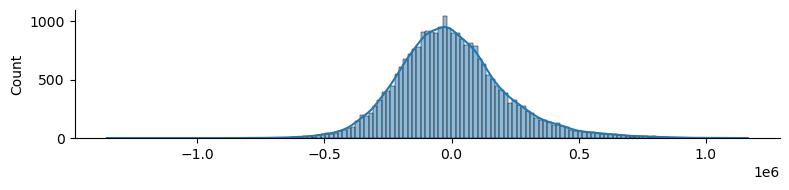

In [234]:
sns.displot(resid, kde = True, height = 2, aspect = 4)
plt.show()

### Q-Q Plot

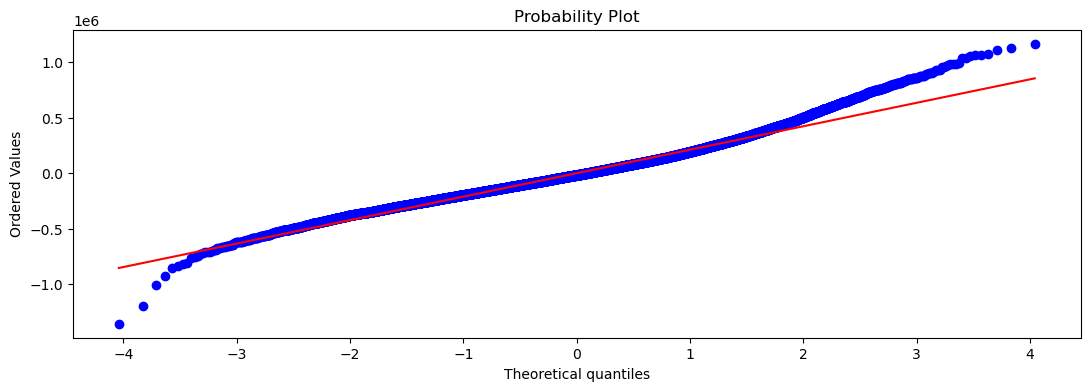

In [239]:
plt.figure(figsize = (13,4))
stats.probplot(resid, plot = plt)
plt.show()

### Test of Normality

In [246]:
print(stats.jarque_bera(resid))

SignificanceResult(statistic=3549.707979521735, pvalue=0.0)


In [248]:
ln_y = np.log(y)
ln_y

,Price
0,13.676248
1,14.263396
2,12.983101
3,14.248591
4,14.364210
...,...
25964,13.897091
25965,13.997832
25966,14.436625
25967,13.186277


In [250]:
model = sm.OLS(ln_y, xc).fit()

In [252]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     2370.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:25:42   Log-Likelihood:                 4126.0
No. Observations:               25969   AIC:                            -8166.
Df Residuals:                   25926   BIC:                            -7815.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         12.6867      0.010   1241.133      0.000      12.667      12.707
Rooms                                          0.1019      0.003     32.992      0.000       0.096       0.108
Distance                                      -0.0176      0.000    -35.612      0.000      -0.019      -0.017
Bedroom                                       -0.0121      0.003     -3.716      0.000      -0.018      -0.006
Bathroom                                       0.0507      0.003     17.973      0.000       0.045       0.056
Car                                            0.0233      0.002     10.299      0.000       0.019       0.028
Landsize                                       0.0001   6.89e-06     14.785      0.000    8.83e-05       0.000
BuildingArea                                   0.0034   4.08e-05     82.728      0.000       0.003       0.003
House_age                                      0.0038   5.59e-05     67.914      0.000       0.004       0.004
Months_since_sale                              0.0029      0.000     15.361      0.000       0.002       0.003
Type_t                                        -0.0780      0.005    -17.007      0.000      -0.087      -0.069
Type_u                                        -0.3046      0.004    -69.570      0.000      -0.313      -0.296
CouncilArea_Bayside City Council               0.3455      0.007     47.111      0.000       0.331       0.360
CouncilArea_Boroondara City Council            0.2759      0.006     47.779      0.000       0.265       0.287
CouncilArea_Brimbank City Council             -0.2008      0.007    -30.300      0.000      -0.214      -0.188
CouncilArea_Cardinia Shire Council            -0.4862      0.041    -11.944      0.000      -0.566      -0.406
CouncilArea_Casey City Council                -0.3064      0.018    -16.985      0.000      -0.342      -0.271
CouncilArea_Frankston City Council            -0.2934      0.014    -20.836      0.000      -0.321      -0.266
CouncilArea_Glen Eira City Council             0.2079      0.006     33.760      0.000       0.196       0.220
CouncilArea_Greater Dandenong City Council     0.0552      0.016      3.438      0.001       0.024       0.087
CouncilArea_Hume City Council                 -0.3065      0.008    -39.063      0.000      -0.322      -0.291
CouncilArea_Kingston City Council              0.1548      0.009     17.178      0.000       0.137       0.173
CouncilArea_Knox City Council                  0.0402      0.014      2.929      0.003       0.013       0.067
CouncilArea_Macedon Ranges Shire Council      -0.3243      0.033     -9.740      0.000      -0.390      -0.259
CouncilArea_Manningham City Council            0.1929      0.008     23.770      0.000

In [254]:
resid = model.resid

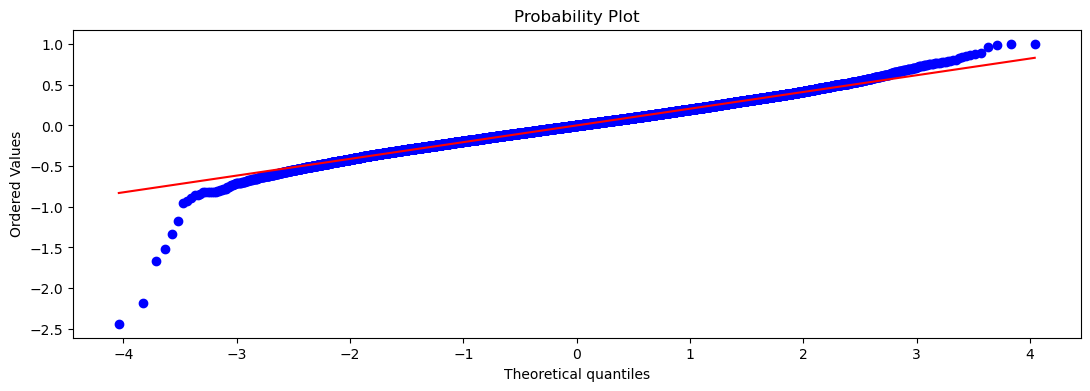

In [256]:
plt.figure(figsize = (13,4))
stats.probplot(resid, plot = plt)
plt.show()

In [258]:
print(stats.jarque_bera(resid))

SignificanceResult(statistic=4906.027612366021, pvalue=0.0)


### Assumption 2: Features are not collinear

In [263]:
vf = [vif(xc.values,i) for i in range(xc.shape[1])]

In [265]:
pd.DataFrame(vf, index = xc.columns, columns = ['vif'])

,vif
const,63.573168
Rooms,4.798373
Distance,3.895112
Bedroom,4.720655
Bathroom,1.678444
Car,1.335822
Landsize,1.685287
BuildingArea,1.972680
House_age,1.444465
Months_since_sale,1.144145


#### *We can note that all VIF values are around 1-2, except rooms with 4.  Hence, the features are not collinear.*

### Assumption 3: There is no heteroscedasticity/ Residuals are homoscedastic

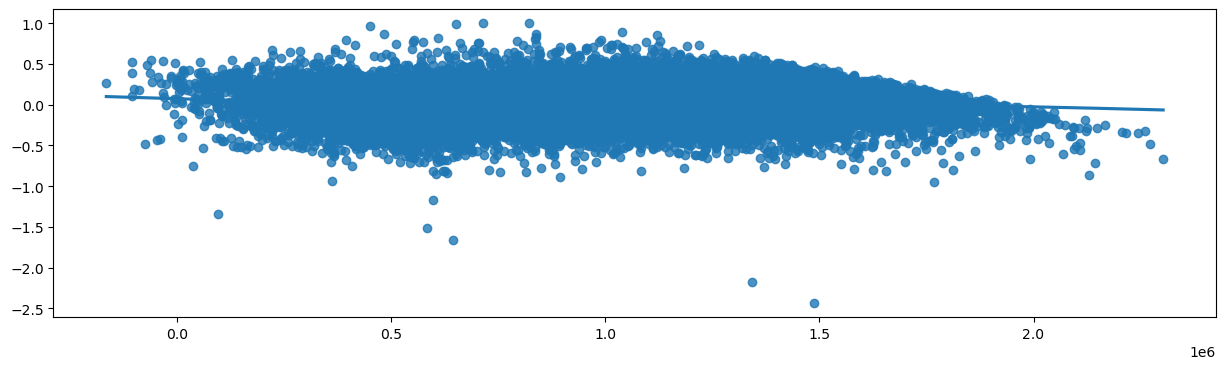

In [269]:
fig, ax = plt.subplots(figsize = (15,4))
sns.regplot(x = y_pred, y = resid, lowess = True, ax = ax)
plt.show()

### Goldfeldt Test

In [271]:
name = ['F statstic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, xc)

In [272]:
test

(1.0171690530983646, 0.16645504757147372, 'increasing')

#### *Since p-val > significance level, we will accept H0 to conclude that variance is constant.*

### Assumption - 4: Residuals are not auto-correlated

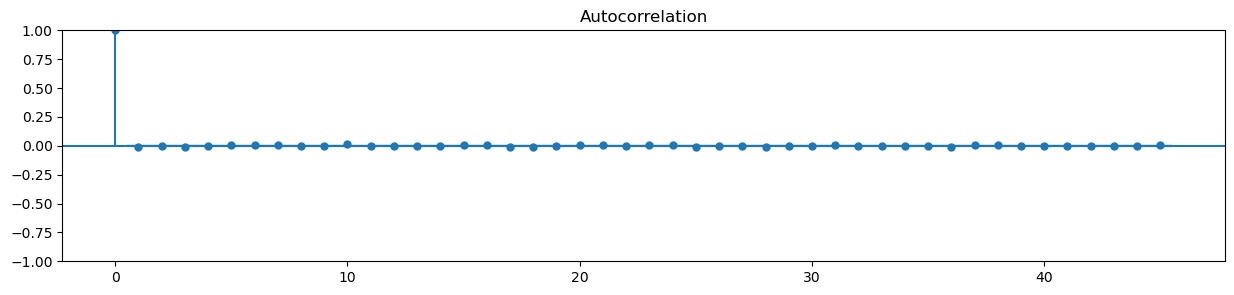

In [275]:
fig, ax = plt.subplots(figsize = (15,3))
smt.graphics.plot_acf(resid, ax = ax)
plt.show()

#### *From the plot, we can note that the points are all almost on 0. Hence, there is no autocorrelation in the data.*

### Assumption 5: Linearity of Relationship

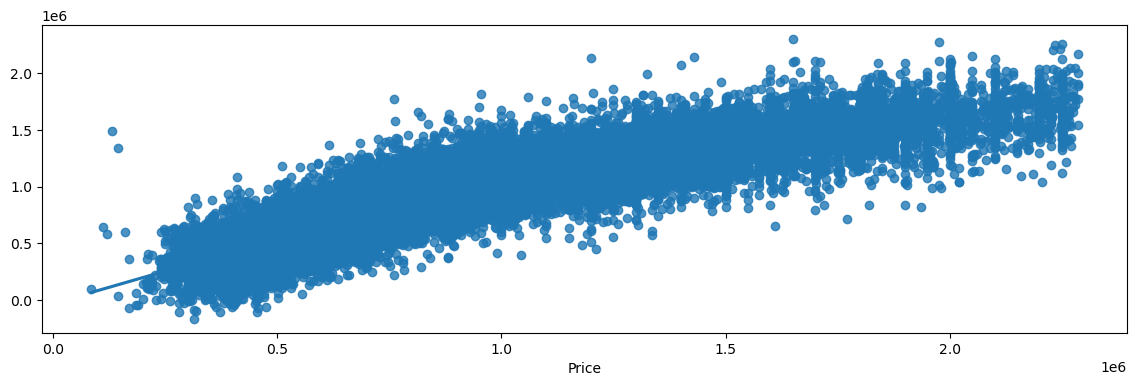

In [278]:
fig, ax = plt.subplots(figsize = (14,4))
sns.regplot(x = y, y = y_pred, lowess = True)
plt.show()

In [279]:
sm.stats.diagnostic.linear_rainbow(res = model, frac = 0.5)

(0.9473515306664916, 0.9989605992536706)

## Evaluating Model Metrics

In [281]:
print('mean absolute error:', mean_absolute_error(y, y_pred))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(y, y_pred))

mean absolute error: 162702.46046265683
mean_absolute_percentage_error: 0.19346430212009863


In [282]:
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred))) #Similar to std. dev.

RMSE: 213603.3934601257


In [286]:
y_diff = y.squeeze() - y_pred

In [288]:
y_diff.mean()

-1.460486225621151e-08

### Amount of error in the lowest 90% of population (based on RMSE)

In [296]:
print('90% of values got an error of |error| <=', 213603.39*1.64)

90% of values got an error of |error| <= 350309.5596
